# Mean Field Inference

In [8]:
import numpy as np
from mlxtend.data import loadlocal_mnist
import matplotlib.pyplot as plt
import operator
from sklearn.metrics import roc_curve, auc

In [2]:
# load MNIST images

ims, _ = loadlocal_mnist(
        images_path='train-images-idx3-ubyte', 
        labels_path='train-labels-idx1-ubyte')

In [3]:
# find 8 neighbors of a given pixel

def find_neighbor(im, idx, w, h):
    s = w*h
    nbr = []
    if idx < 0 or idx > s-1:
        return nbr
    if idx-1 >= 0 and idx%w != 0:
        nbr.append(idx-1)
    if idx+1 < s and (idx+1)%w != 0:
        nbr.append(idx+1)
    if idx-w >= 0:
        nbr.append(idx-w)
    if idx+w < s:
        nbr.append(idx+w)
    if idx-w-1 >= 0 and idx%w != 0:
        nbr.append(idx-w-1)
    if idx-w+1 >= 0 and (idx+1)%w != 0:
        nbr.append(idx-w+1)
    if idx+w-1 < s and idx%w != 0:
        nbr.append(idx+w-1)
    if idx+w+1 < s and (idx+1)%w != 0:
        nbr.append(idx+w+1)
    return nbr

In [109]:
# Update an image using mean field inference until it converges(update<delta)

def update_image(im, theta_h, theta_x, pi_i, delta):
    temp_im = im.copy()
    temp_pi_i = pi_i.copy() # updated pi
    old_pi = pi_i.copy()
    while 1 == 1:
        diff = 0
        old_pi = temp_pi_i.copy()
        for p in range(im.shape[0]):
            nbr = find_neighbor(im, p, 28, 28)
            q_plus = 0
            q_minus = 0
            for n in nbr:
                q_plus += 0.2 * (2*old_pi[n] - 1 + im[n])
                q_minus += -q_plus
            temp_pi_i[p] = np.exp(q_plus)/(np.exp(q_plus)+np.exp(q_minus))
            #print(temp_pi_i[p])
            if abs(temp_pi_i[p] - old_pi[p]) > diff:
                diff = abs(temp_pi_i[p] - old_pi[p])
            if temp_pi_i[p] > 0.5:
                temp_im[p] = 1
            else:
                temp_im[p] = -1
        im = temp_im
        if diff <= delta:
            print(diff)
            break
    return im, temp_pi_i

In [110]:
# take the first 500 MNIST images as original images and denoise 2% pixels randomly

im_in = ims[0:500][:]/255.0
im_noise = im_in.copy()
rand_idx = np.arange(im_in.shape[1])
for i in range(im_in.shape[0]):
    for j in range(im_in.shape[1]):
        if im_in[i][j]>=0.5:
            im_in[i][j] = 1
            im_noise[i][j] = 1
        else:
            im_in[i][j] = -1
            im_noise[i][j] = -1
    np.random.shuffle(rand_idx)
    for k in range(int(len(rand_idx)*0.02)):
        p = rand_idx[k]
        im_noise[i][p]*=-1

In [111]:
pi = np.ones((im_in.shape[0], im_in.shape[1]))*0.5
im_out = im_noise.copy()
delta = 0.001
im_out[0], pi[0]= update_image(im_out[0], 0.2, 0.2, pi[0], delta)


1.73178823279e-05


In [112]:
print(im_out[0])

[-1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1

In [68]:
# reconstruct images

pi = np.ones((im_in.shape[0], im_in.shape[1]))*0.5
im_out = im_noise.copy()
delta = 0.001
for i in range(im_out.shape[0]):
    im_out[i], pi[i]= update_image(im_out[i], 0.2, 0.2, pi[i], delta)

3.25202899387e-07
3.03536793905e-08
4.69032876978e-07
3.25202899876e-07
3.25202899876e-07
5.44096971407e-10
3.25202899876e-07
5.69901653795e-08
3.25202899876e-07
2.50798703404e-08
2.68463095494e-08
3.25202893836e-07
2.54702445931e-08
1.31082467735e-08
0.000449911208735
1.32398602539e-09
5.83940348894e-07
5.65767699977e-08
0.000449911208735
3.25202899876e-07
2.44131645346e-08
1.37935169464e-08
2.63226027817e-06
3.25202899876e-07
3.25202889485e-07
5.01506762309e-08
3.25202899876e-07
2.36633283272e-08
1.31443712663e-08
1.10738344646e-06
3.29362989944e-08
2.24291808438e-08
3.25202899387e-07
1.39042034375e-08
7.2085095084e-08
3.25202899876e-07
1.72403860019e-08
5.84023489647e-08
7.97427043037e-07
2.12531197022e-07
3.25202899876e-07
3.19501005121e-08
3.25202899876e-07
3.25202899876e-07
3.25202899786e-07
8.28780523811e-10
3.25202889485e-07
4.69032876978e-07
3.25202899876e-07
3.02087749123e-08
4.05321039301e-07
5.52947358766e-08
7.60542727771e-06
1.1772510235e-07
3.25202899876e-07
9.2471341390

KeyboardInterrupt: 

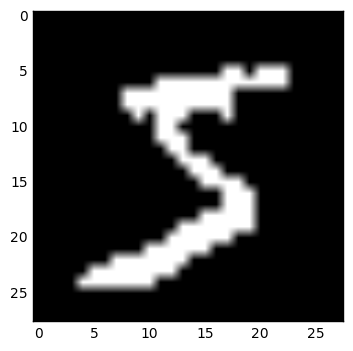

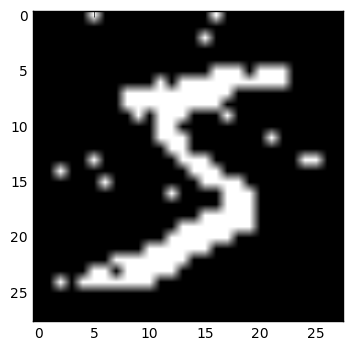

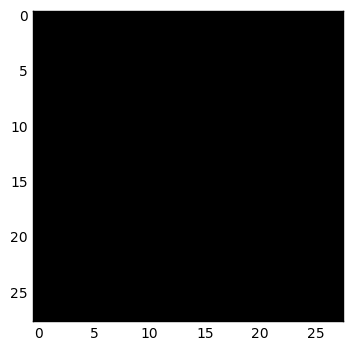

In [83]:
# plot original, noised, denoised images
# replace this image to be most&least accurate reconstructions

plt.figure()
plt.imshow(im_in[0].reshape(28,28), cmap="gray")
plt.figure()
plt.imshow(im_noise[0].reshape(28,28), cmap="gray")
plt.figure()
plt.imshow(im_out[0].reshape(28,28), cmap="gray")
plt.show()

In [66]:
### TO DO: find the most&least accurate reconstructions and plot original, noised, denoised images
total_accuracy = np.zeros(im_in.shape[0])
for i in range(im_in.shape[0]):
    wrong = 0
    curr = im_in[i]
    compare = im_out[i]
    for j in range(curr.shape[0]):
        if curr[j] != compare[j]:
               wrong += 1
    accuracy = 1 - 1.0 * (wrong)/curr.shape[0]
    total_accuracy[i] = accuracy
average_accuracy = sum(total_accuracy)/500
print(average_accuracy)

0.872653061224


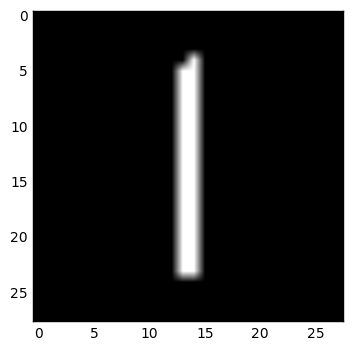

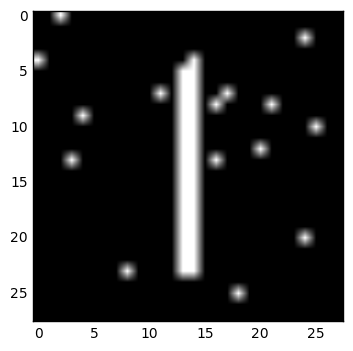

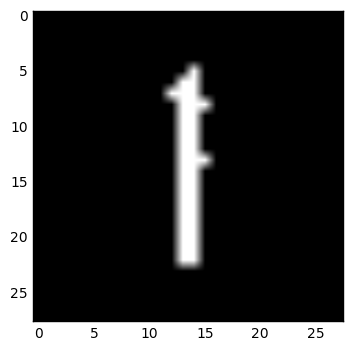

In [36]:
# best reconstruction

best, value = max(enumerate(total_accuracy), key=operator.itemgetter(1))
plt.figure()
plt.imshow(im_in[best].reshape(28,28), cmap="gray")
plt.figure()
plt.imshow(im_noise[best].reshape(28,28), cmap="gray")
plt.figure()
plt.imshow(im_out[best].reshape(28,28), cmap="gray")
plt.show()

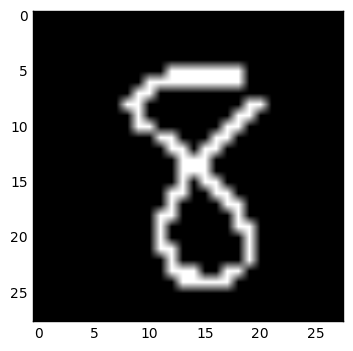

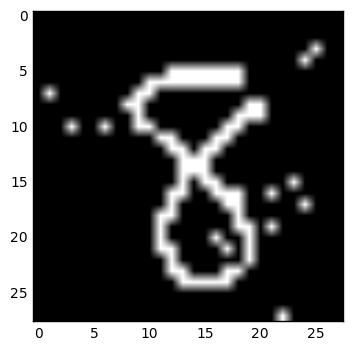

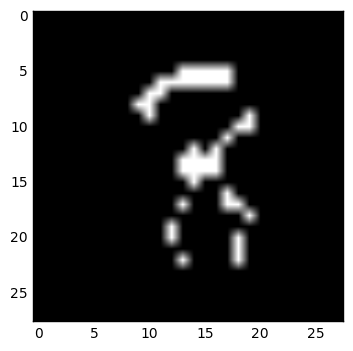

In [37]:
# worst reconstruction

worst, value = min(enumerate(total_accuracy), key=operator.itemgetter(1))
plt.figure()
plt.imshow(im_in[worst].reshape(28,28), cmap="gray")
plt.figure()
plt.imshow(im_noise[worst].reshape(28,28), cmap="gray")
plt.figure()
plt.imshow(im_out[worst].reshape(28,28), cmap="gray")
plt.show()

0.965933673469
0.965933673469
0.965933673469
0.965933673469
0.965933673469
0.965933673469
0.965933673469
0.965933673469


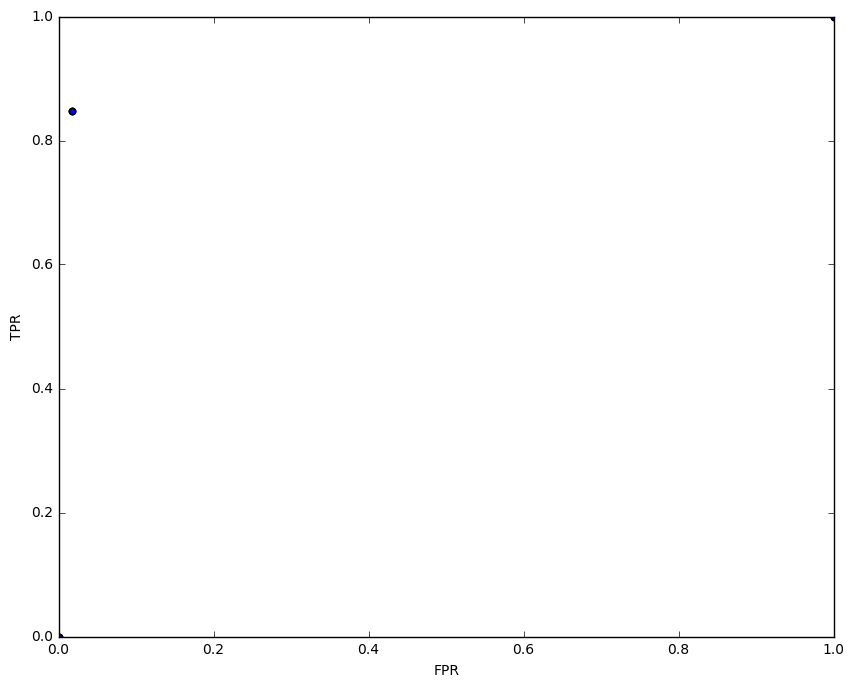

In [135]:
### TO DO: plot receiving operating curve -1, 0, 0.2, 1, 2
parameters = [0, 0.2, 1, 2]

pred = {}

label = im_in.reshape(500 * 784)

plt.figure(figsize = (10,8))
lw = 2
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('FPR')
plt.ylabel('TPR')
cmap = plt.cm.get_cmap("hsv", 7)

for para in parameters:
    fpr = dict()
    tpr = dict()
    pi = np.ones((im_in.shape[0], im_in.shape[1]))*0.5
    im_out = im_noise.copy()
    delta = 0.001
    for i in range(im_out.shape[0]):
        im_out[i], pi[i]= update_image(im_out[i], para, 0.2, pi[i], delta)
    accr = get_accuracy(im_out)
    pred[para] = im_out.reshape(500 * 784)
    fpr[para],tpr[para], _ = roc_curve(label, pred[para])
    plt.scatter(fpr[para], tpr[para])
plt.show()

In [136]:
def update_image(im, theta_h, theta_x, pi_i, delta):
    temp_im = im.copy()
    temp_pi_i = pi_i.copy()
    diff = 0
    for p in range(im.shape[0]):
        nbr = find_neighbor(im, p, 28, 28)
        q_plus = 0
        q_minus = 0
        for n in nbr:
            q_plus += (theta_h * (2*pi_i[n] - 1) + theta_x * im[n])
            q_minus += -q_plus
        temp_pi_i[p] = np.exp(q_plus)/(np.exp(q_plus)+np.exp(q_minus))
        if abs(temp_pi_i[p] - pi_i[p]) > diff:
            diff = abs(temp_pi_i[p] - pi_i[p])
        if temp_pi_i[p] > 0.5:
            temp_im[p] = 1
        else:
            temp_im[p] = -1
    im = temp_im
    pi_i = temp_pi_i
    if diff > delta:
        update_image(im, theta_h, theta_x, pi_i, delta)
    return im, pi_i

In [127]:
# (0.10801020408163266, 0.014729591836734694) for theta = 0
# (0.10801020408163266, 0.014729591836734694) for theta = 0.2
def get_accuracy(test):
    total_accuracy = np.zeros(im_in.shape[0])
    for i in range(im_in.shape[0]):
        wrong = 0
        curr = im_in[i]
        compare = test[i]
        for j in range(curr.shape[0]):
            if curr[j] != compare[j]:
                   wrong += 1
        accuracy = 1 - 1.0 * (wrong)/curr.shape[0]
        total_accuracy[i] = accuracy
    average_accuracy = sum(total_accuracy)/500
    print(average_accuracy)
    return average_accuracy

In [42]:
def perf_measure(y_actual, y_hat):
    TP = 0
    FP = 0
    TN = 0
    FN = 0

    for i in range(len(y_hat)): 
        if y_actual[i]==y_hat[i]==1:
           TP += 1
        if y_hat[i]==1 and y_actual[i]!=y_hat[i]:
           FP += 1
        if y_actual[i]==y_hat[i]==-1:
           TN += 1
        if y_hat[i]==-1 and y_actual[i]!=y_hat[i]:
           FN += 1

    return(TP, FP, TN, FN)